## Prophet Model for prediction 

#### Librairies


In [2]:
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#from fbprophet import Prophet
import datetime 

In [3]:
import warnings 
warnings.simplefilter('ignore')

## Loading and processing the Data

In [4]:
df = pd.read_csv("../dataset/outputs.csv")
print("Shape du Dataframe ",df.shape)
print("Description of the Dataframe \n",df.describe())
print ("Columns : ",df.columns)

Shape du Dataframe  (70128, 11)
Description of the Dataframe 
                 IDS          Mois     RES1_BASE    RES11_BASE     PRO1_BASE  \
count  70128.000000  70128.000000  70128.000000  70128.000000  16654.000000   
mean   36311.645791      6.523728      1.018126      1.005332      0.994580   
std    22613.359627      3.448722      0.327419      0.370323      0.374402   
min        1.000000      1.000000      0.464839      0.375086      0.477145   
25%    17532.750000      4.000000      0.756438      0.758597      0.677279   
50%    35064.500000      7.000000      0.999876      0.934851      0.949498   
75%    52596.250000     10.000000      1.217374      1.230670      1.190569   
max    87648.000000     12.000000      2.190382      2.528628      2.438356   

            RES2_HC       RES2_HP       PRO2_HC       PRO2_HP  
count  70128.000000  70128.000000  16654.000000  16654.000000  
mean       0.992186      1.018606      1.005489      1.009992  
std        1.181766      0.865476

In [61]:
df.head()

,IDS,Horodate_UTC,Horodate,Mois,RES1_BASE,RES11_BASE,PRO1_BASE,RES2_HC,RES2_HP,PRO2_HC,PRO2_HP
0,1,13/10/2013 22:00,2013-10-13T00:00:00+02:00,10,0.791405,0.698925,NaN,2.780413,0.346364,NaN,NaN
1,2,13/10/2013 22:30,2013-10-13T00:30:00+02:00,10,0.693700,0.722778,NaN,2.301527,0.375439,NaN,NaN
2,3,13/10/2013 23:00,2013-10-13T01:00:00+02:00,10,0.648565,0.678717,NaN,2.361320,0.268125,NaN,NaN
3,4,13/10/2013 23:30,2013-10-13T01:30:00+02:00,10,0.621059,0.668509,NaN,2.567490,0.192953,NaN,NaN
4,5,14/10/2013 00:00,2013-10-13T02:00:00+02:00,10,0.612245,0.700487,NaN,2.563460,0.075701,NaN,NaN


<AxesSubplot:xlabel='Horodate_UTC'>

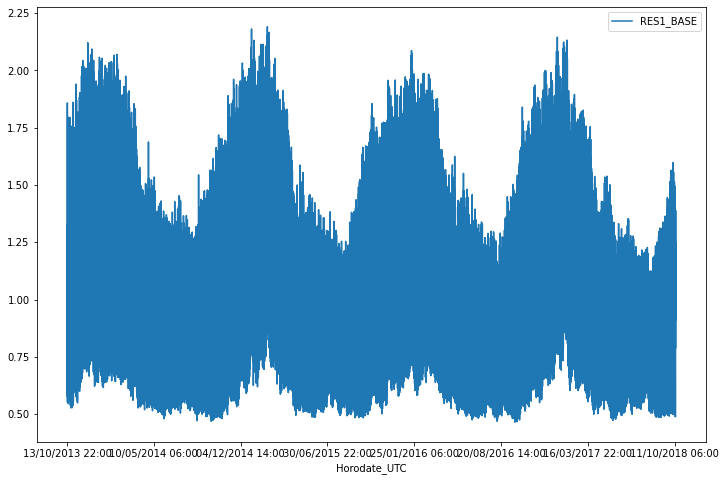

In [9]:
mydf=df[['IDS','Horodate_UTC','RES1_BASE']]
mydf.head()
df.plot("Horodate_UTC","RES1_BASE",figsize=(12,8))

In [10]:

def change_date_format(date):
    """We want to have this format for the prophet API : YYYY-MM-DD HH:MM:SS"""
    return datetime.datetime.strptime(date, '%d/%m/%Y %H:%M').strftime('%Y-%m-%d %H:%M:00')

Index(['ds', 'y'], dtype='object')
                    ds         y
0  2013-10-13 22:00:00  0.791405
1  2013-10-13 22:30:00  0.693700
2  2013-10-13 23:00:00  0.648565
3  2013-10-13 23:30:00  0.621059
4  2013-10-14 00:00:00  0.612245


<AxesSubplot:xlabel='ds'>

<Figure size 864x576 with 0 Axes>

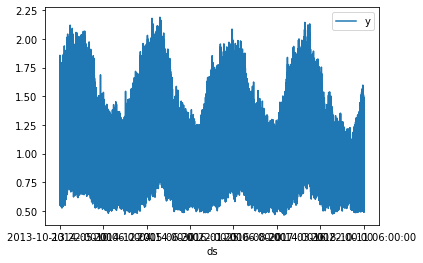

In [11]:
mydf["Horodate_UTC"]=mydf["Horodate_UTC"].apply(change_date_format)
mydf=mydf.drop(columns=["IDS"])
mydf=mydf.rename(columns={"Horodate_UTC":"ds","RES1_BASE":"y"})
print(mydf.columns)
print(mydf.head())
plt.figure(figsize=(12,8))
mydf.plot("ds","y")


In [13]:
print(len(df))
70128-65130

70128


4998

In [14]:
mydf=mydf[0:65130]

In [66]:
'''mydf["ds"]=pd.DatetimeIndex(mydf["ds"])
print(mydf.dtypes)
mydf.plot("ds","y")'''

'mydf["ds"]=pd.DatetimeIndex(mydf["ds"])\nprint(mydf.dtypes)\nmydf.plot("ds","y")'

In [15]:
mydf.head()
mydf.tail()

,ds,y
65125,2017-07-01 16:30:00,1.034000
65126,2017-07-01 17:00:00,1.100963
65127,2017-07-01 17:30:00,1.120629
65128,2017-07-01 18:00:00,1.126781
65129,2017-07-01 18:30:00,1.102073


## Train the Model

In [68]:
m=Prophet(interval_width=0.95,changepoint_prior_scale=0.01).fit(mydf)#,weekly_seasonality=True,daily_seasonality=True)

## Making Predictions 

In [69]:
future=m.make_future_dataframe(periods=8700,freq='H')
forecast=m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-10-13 22:00:00,1.07031,0.691382,1.152725,1.07031,1.07031,-0.139900,-0.139900,-0.139900,-0.156620,...,0.032935,0.032935,0.032935,-0.016215,-0.016215,-0.016215,0.0,0.0,0.0,0.930411
1,2013-10-13 22:30:00,1.07030,0.629682,1.071654,1.07030,1.07030,-0.217908,-0.217908,-0.217908,-0.233345,...,0.031589,0.031589,0.031589,-0.016152,-0.016152,-0.016152,0.0,0.0,0.0,0.852392
2,2013-10-13 23:00:00,1.07029,0.553660,1.009935,1.07029,1.07029,-0.275955,-0.275955,-0.275955,-0.290085,...,0.030219,0.030219,0.030219,-0.016089,-0.016089,-0.016089,0.0,0.0,0.0,0.794335
3,2013-10-13 23:30:00,1.07028,0.529275,0.971409,1.07028,1.07028,-0.318727,-0.318727,-0.318727,-0.331528,...,0.028826,0.028826,0.028826,-0.016026,-0.016026,-0.016026,0.0,0.0,0.0,0.751553
4,2013-10-14 00:00:00,1.07027,0.491324,0.956783,1.07027,1.07027,-0.351967,-0.351967,-0.351967,-0.363417,...,0.027413,0.027413,0.027413,-0.015963,-0.015963,-0.015963,0.0,0.0,0.0,0.718304


In [70]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
73825,2018-06-29 02:30:00,0.971687,-0.085915,0.831666,0.578227,1.346860,-0.603141,-0.603141,-0.603141,-0.450778,...,-0.023946,-0.023946,-0.023946,-0.128417,-0.128417,-0.128417,0.0,0.0,0.0,0.368546
73826,2018-06-29 03:30:00,0.971684,-0.008878,0.842088,0.578168,1.346931,-0.554148,-0.554148,-0.554148,-0.402315,...,-0.023461,-0.023461,-0.023461,-0.128372,-0.128372,-0.128372,0.0,0.0,0.0,0.417536
73827,2018-06-29 04:30:00,0.971682,0.080493,0.974544,0.578109,1.347002,-0.435690,-0.435690,-0.435690,-0.284460,...,-0.022903,-0.022903,-0.022903,-0.128328,-0.128328,-0.128328,0.0,0.0,0.0,0.535992
73828,2018-06-29 05:30:00,0.971679,0.233999,1.131954,0.578050,1.347073,-0.286103,-0.286103,-0.286103,-0.135548,...,-0.022273,-0.022273,-0.022273,-0.128283,-0.128283,-0.128283,0.0,0.0,0.0,0.685577
73829,2018-06-29 06:30:00,0.971677,0.353467,1.271060,0.577991,1.347144,-0.157578,-0.157578,-0.157578,-0.007771,...,-0.021569,-0.021569,-0.021569,-0.128237,-0.128237,-0.128237,0.0,0.0,0.0,0.814099


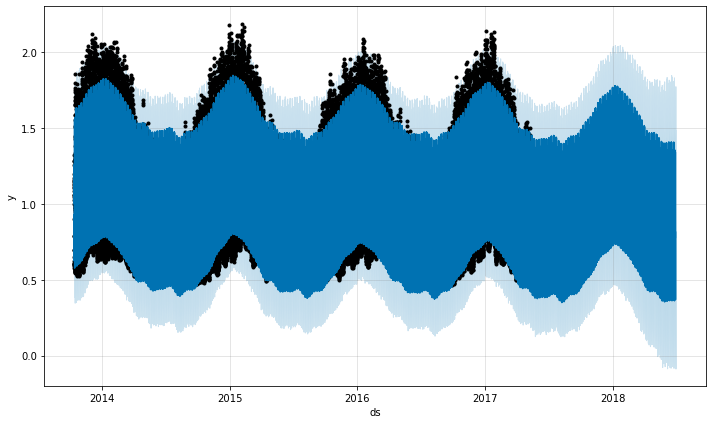

In [71]:
plot1=m.plot(forecast)

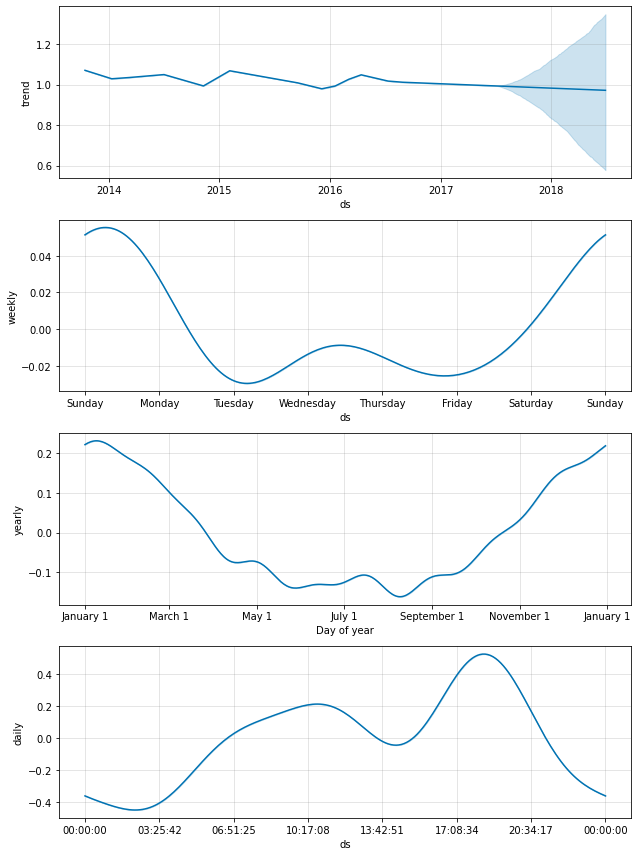

In [72]:
plot2=m.plot_components(forecast)

<AxesSubplot:xlabel='ds'>

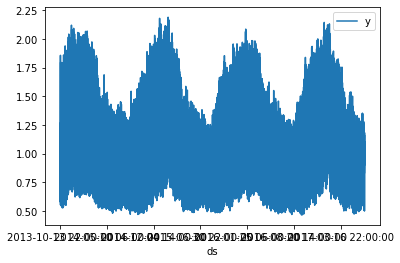

In [73]:
mydf.plot("ds","y")

<AxesSubplot:xlabel='Horodate_UTC'>

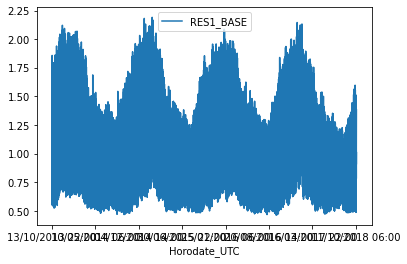

In [74]:
df.plot("Horodate_UTC","RES1_BASE")


In [ ]:
from sklearn.metrics import mean_absolute_error

In [1]:
y_true = mydf['y'][-12:].values
y_pred = forecast['yhat'][-12:].values
mae = mean_absolute_error(y_true,y_pred)
print('MAE: %.3f' % mae)

mae = mean_absolute_error()

NameError: name 'mydf' is not defined